## 08 - Mathematical morphology

Moacir A. Ponti - ICMC/USP

To implement image processing with mathematical morphology we have to:
1. define a structuring element
2. slide this element through the image
3. modify the image according to how the structuring element locally matches the pixels

In [1]:
import numpy as np
import imageio
from skimage import morphology
import matplotlib.pyplot as plt

**morphology** contains the main structuring element shapes. The *disk* is one of the most widely use because it is smooth

In [4]:
morphology.disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

However, we can import other structuring elements

In [5]:
from skimage.morphology import (square, rectangle, diamond, disk, star)

In [6]:
diamond(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [7]:
disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [8]:
struc_elem_2d = [square(7), rectangle(7, 11), diamond(7), disk(7),  star(7)]

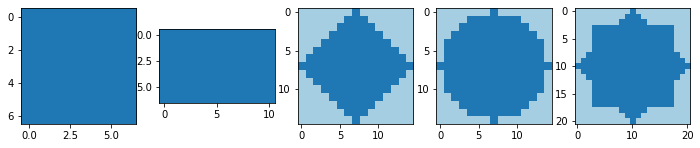

In [9]:
fig = plt.figure(figsize=(12, 6))

idx = 1
for struc in struc_elem_2d:
    ax = fig.add_subplot(1, 5, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=10)
    
    idx += 1

We can also design our own structuring element

In [10]:
my_struc = np.zeros([9,9])
my_struc[3:6] = 1
my_struc[:,4] = 1
my_struc

array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]])

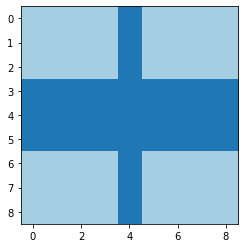

In [11]:
plt.imshow(my_struc, cmap="Paired", vmax=10)

---

Let us try some basic operators on an image!

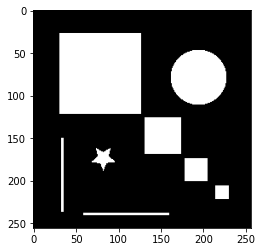

In [12]:
imgbin = imageio.imread("images/morpho.png")
plt.imshow(imgbin, cmap="gray")

### Erosion

All local pixels of the image have to overlap those of the structuring element
* minimum filter: replace the value of a pixel by the minimal value covered by the structuring element.

Text(0.5, 1.0, 'erosion with disk 7')

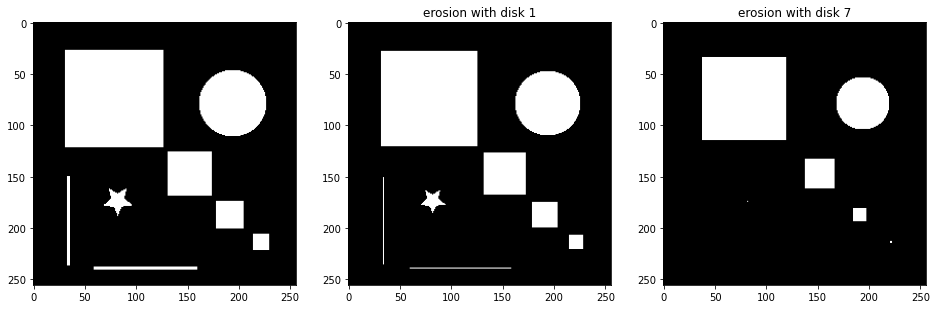

In [13]:
img_er1 = morphology.binary_erosion(imgbin, morphology.disk(1)).astype(np.uint8)
img_er3 = morphology.binary_erosion(imgbin, morphology.disk(7)).astype(np.uint8)

fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1); plt.imshow(imgbin, cmap="gray")
plt.subplot(1, 3, 2); plt.imshow(img_er1, cmap="gray"); plt.title("erosion with disk 1")
plt.subplot(1, 3, 3); plt.imshow(img_er3, cmap="gray"); plt.title("erosion with disk 7")

### Dilation

At least one local pixel of the image have to overlap those of the structuring element
* maximum filter: replace the value of a pixel by the maximum value covered by the structuring element.

Text(0.5, 1.0, 'dilation with disk 7')

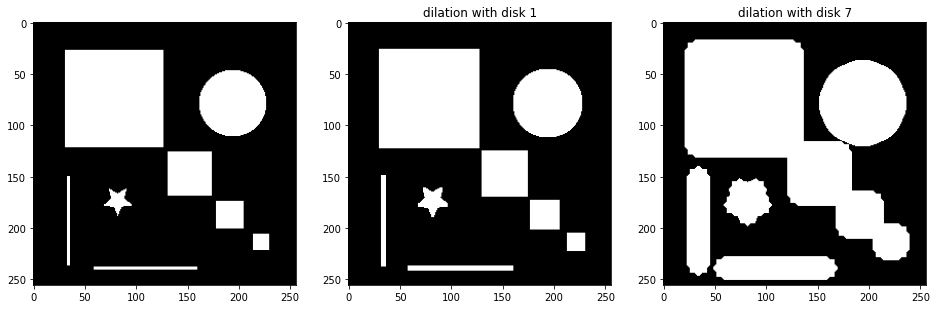

In [16]:
img_di1 = morphology.binary_dilation(imgbin, morphology.star(1)).astype(np.uint8)
img_di3 = morphology.binary_dilation(imgbin, morphology.star(7)).astype(np.uint8)

fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1); plt.imshow(imgbin, cmap="gray")
plt.subplot(1, 3, 2); plt.imshow(img_di1, cmap="gray"); plt.title("dilation with disk 1")
plt.subplot(1, 3, 3); plt.imshow(img_di3, cmap="gray"); plt.title("dilation with disk 7")

The effect of different structuring elements

In [17]:
cross_4 = np.zeros([9,9])
cross_4[:,4] = 1
cross_4[4,:] = 1
cross_4

array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [18]:
disk(4)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

Text(0.5, 1.0, 'erosion cross')

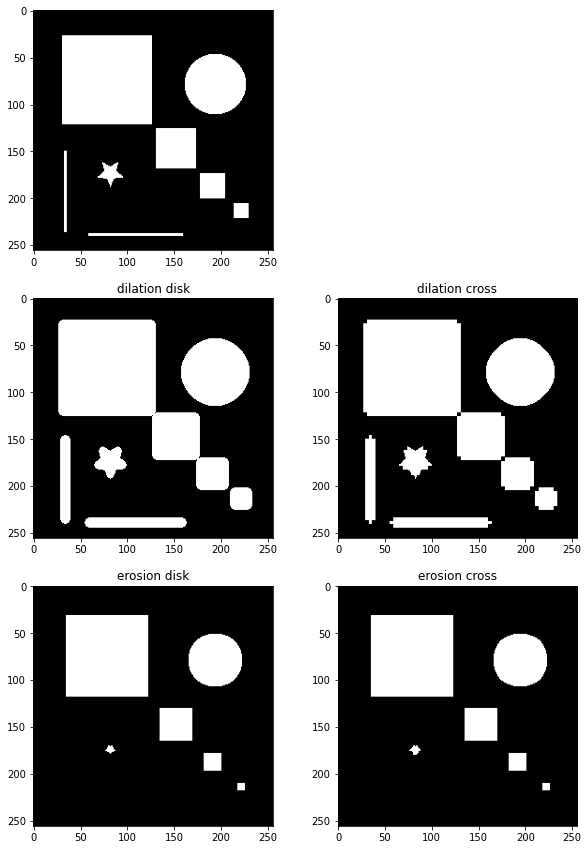

In [19]:
img_dd = morphology.binary_dilation(imgbin, morphology.disk(4)).astype(np.uint8)
img_dc = morphology.binary_dilation(imgbin, cross_4).astype(np.uint8)
img_ed = morphology.binary_erosion(imgbin, morphology.disk(4)).astype(np.uint8)
img_ec = morphology.binary_erosion(imgbin, cross_4).astype(np.uint8)

fig = plt.figure(figsize=(10, 15))
plt.subplot(3, 2, 1); plt.imshow(imgbin, cmap="gray")
plt.subplot(3, 2, 3); plt.imshow(img_dd, cmap="gray"); plt.title("dilation disk")
plt.subplot(3, 2, 4); plt.imshow(img_dc, cmap="gray"); plt.title("dilation cross")
plt.subplot(3, 2, 5); plt.imshow(img_ed, cmap="gray"); plt.title("erosion disk")
plt.subplot(3, 2, 6); plt.imshow(img_ec, cmap="gray"); plt.title("erosion cross")